In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
def read_out(file):
    with open(file, "r") as f:
        lines = f.readlines()
        return lines

In [7]:
def read_file(file_name, N):
    x, y, q, a, b, serv = [], [], [], [], [], []
    K, Q = 0, 0
    with open (file_name) as f:
        lines = f.readlines()
        K,Q = lines[4].split()
        K = int(K)
        Q = int(Q)
        option = lines[5].strip()[-2:]
        for i in range(9, 10 + N):
            _,x_i, y_i, q_i, a_i, b_i, serv_i  = str(lines[i]).split()
            x.append(int(x_i))
            y.append(int(y_i))
            q.append(int(q_i))
            a.append(int(a_i))
            b.append(int(b_i))
            serv.append(int(serv_i))
    return K, Q, x, y, q, a, b, serv

Read training data and count the frequencies of arcs, and choose arcs to remove then write them in a file.  
Different policies of choosing arcs to removed are in the comment.  
Filter 1: Two customers have never been on the same route, then the arcs between them are removed.  
Filter 2: Filter 1+  
Filter 3: If two customers have never been consecutive then the arcs between them are removed.  
Consider also some additional filters  
For each arc whose frequencies less than a threshold, choos

51


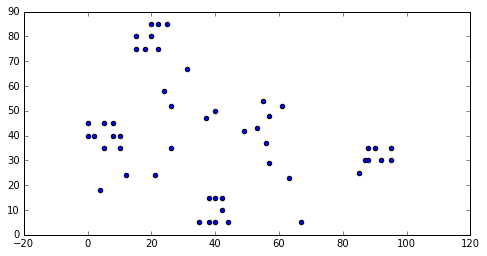

9567


In [8]:
K, Q, x, y, q, a, b, serv = read_file("In/rc101.txt", 100)
# a = []
c = 0
locations = {}
for i in range(101):
    locations[str(x[i]) + " " + str(y[i])] = i
l_ = {}
arcs = np.zeros(101 * 101)
arcs = arcs.reshape(101,101)
with open("removed-arcs/train_rc101", "w") as f:
    for file in os.listdir("Test_in_out/1/"):
        if file.startswith("rc101"):
            if c < 225:
                c += 1
                out = read_out("Test_in_out/1/" + file)
                x_ = []
                y_ = []
                for line in out:
                    coords = line.strip().split()
                    x_.append(coords[0] + " " + coords[1])
                    y_.append(coords[2] + " " + coords[3])
                    if not (coords[0] + " " + coords[1]) in l_:
                        l_[coords[0] + " " + coords[1]] = True
                    if not (coords[2] + " " + coords[3]) in l_:
                        l_[coords[2] + " " + coords[3]] = True
# Uncomment this and comment part 1 to use filter 3
#                 for i in range(len(x_)):
#                     arcs[locations[x_[i]]][locations[y_[i]]] += 1
# Starting of part 1
                aa = []
                for i in range(len(x_)):
                    if locations[y_[i]] == 0:
                        for j in range(len(aa) - 1):
                            for k in range(j + 1, len(aa)):
                                arcs[aa[j]][aa[k]] = arcs[aa[j]][aa[k]] + 1
#                                 arcs[aa[k]][aa[j]] = arcs[aa[k]][aa[j]] + 1
# uncomment this to use filter 2
                        aa = [0]
                    else:
                        aa.append(locations[y_[i]])
# end of part 1
            else:
#                 pass
                f.write(file+"\n")

plt.figure(figsize=(8,4))
# plt.scatter(x,y)
cc = 0

# for i in range(1, len(x) - 1):
#     for j in range(i, len(x)):
#         if i!= j and arcs[i][j]/c > 0.05:
#             cc+=1
#             plt.plot([x[i], x[j]], [y[i], y[j]], "r")
ca = 0
for i in range(0, len(x)):
    if (str(x[i]) + " " + str(y[i])) in l_ :
        plt.scatter([x[i]], [y[i]])
        ca += 1
print(ca)
with open("removed-arcs/rc101_11", "w") as f:
    for i in range(1, len(x)):
        for j in range(1, len(x)):
            if i!= j:
                mm =  int((arcs[i][j]/c) * 1000)//10
            if i!= j and mm <= 5:
                s = np.random.random()
                if s > mm/5:
                    cc += 1
                    f.write(str(x[i]) + " " + str(y[i]) + " " + str(x[j]) + " " + str(y[j]) + "\n")
#             if i!= j and arcs[i][j] == 0:
#                 cc+=1
#                 f.write(str(x[i]) + " " + str(y[i]) + " " + str(x[j]) + " " + str(y[j]) + "\n")
# #                 plt.plot([x[i], x[j]], [y[i], y[j]], "r")
#             elif i!= j and arcs[i][j]/c <= 0.1:
#                 s = np.random.random()
#                 if s > 1/3:
#                     cc+=1
#                     f.write(str(x[i]) + " " + str(y[i]) + " " + str(x[j]) + " " + str(y[j]) + "\n")

# This part chooses arcs that appear frequently
# with open("frequent-arcs/rc101", "w") as f:
#     for i in range(1, len(x) - 1):
#         for j in range(1, len(x)):
#             if i!= j and arcs[i][j]/c > 0.5:
#                 cc+=1
# #                 f.write(str(x[i]) + " " + str(y[i]) + " " + str(x[j]) + " " + str(y[j]) + "\n")
# #                 plt.plot([x[i], x[j]], [y[i], y[j]], "r")
plt.show()
print(cc)

Below are the codes to do clustering for larger problem.  
Starting from each node in its own cluster, consider the list of arcs in decreasing order of frequencies.  
Two clusters are joined if an arc between them appears  

In [9]:
label = {}

In [10]:
def get_label(i):
    x = i
    while label[x] != x:
        x = label[x]
    return x

In [11]:
list_arcs = []
for i in range(1,51):
    for j in range(i + 1, 51):
        list_arcs.append((i,j))

In [12]:
list_arcs = sorted(list_arcs, key= lambda x: -arcs[x[0]][x[1]])

In [13]:
label = {}
for i in range(0, len(x)):
    label[i] = i
union = []
for i in range(len(x)):
    union.append([i])
for h in list_arcs:
    i, j = h[0], h[1]
    l_i = get_label(i)
    l_j = get_label(j)
    if l_i != 0 and l_j != 0 and len(union[l_i]) + len(union[l_j]) < 30:
        if (l_i < l_j):
            union[l_i].extend(union[l_j])
#                         if len(union[l_i]) > 50:
#                             label[l_i] = 0
            label[l_j] = l_i
        elif (l_j < l_i):
            union[l_j].extend(union[l_i])
#                         if len(union[l_j]) > 50:
#                             label[l_j] = 0
            label[l_i] = l_j
                

29 

21 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 

1 



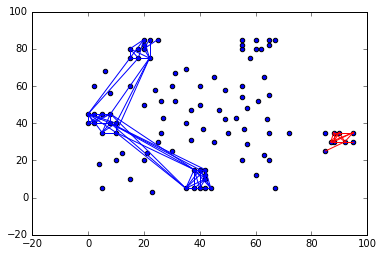

In [14]:
kk = 0
colors = ['b', 'r', 'c', 'g', 'k', 'y', 'm', '#eeefff', '#e00f00', '#111fff']
plt.scatter(x,y)
color_ = 0
for i in range(1, len(x)):
    if label[i] == i or label[i] == 0:
        print(len(union[i]), "\n")
        for u_1 in union[i]:
            for u_2 in union[i]:
                if u_2 > u_1 and arcs[u_1][u_2] > 0:
                    plt.plot([x[u_1], x[u_2]], [y[u_1], y[u_2]], color = colors[color_])
        kk += len(union[i])
        color_ += 1

In [31]:
def write_to_file(filename, x, y):
    with open(filename, 'w') as f:
        for i in range(len(x)):
            f.write(str(x[i]) + " " + str(y[i]) + "\n")

In [32]:
def create_sub_problem(basename, label, union, x, y):
    sub = 0
    for i in range(1, len(x)):
        if label[i] == i or label[i] == 0:
            sub += 1
            x_ = []
            y_ = []
            for j in union[i]:
                x_.append(x[j])
                y_.append(y[j])
            filename = "Subprob-30/" + basename+"_"+str(sub)
            write_to_file(filename,x_, y_)

In [19]:
create_sub_problem("RC1", label, union, x, y)